# Exploratory Data Analysis

In [19]:
# imports
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

### 1.Scan the dataset structure

In [20]:
data_dir = "../data/PlantVillage"
class_counts = defaultdict(int)

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len(os.listdir(cls_path))
        class_counts[cls] = count

# Print sorted counts
for cls, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{cls}: {count} images")


Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images
Tomato_Bacterial_spot: 2127 images
Tomato_Late_blight: 1909 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato_healthy: 1591 images
Pepper__bell___healthy: 1478 images
Tomato__Target_Spot: 1404 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Tomato_Early_blight: 1000 images
Pepper__bell___Bacterial_spot: 997 images
Tomato_Leaf_Mold: 952 images
Tomato__Tomato_mosaic_virus: 373 images
Potato___healthy: 152 images


### Bar Plot: Class Distribution

C:\Users\DZKAM\AppData\Local\Temp\ipykernel_8212\1355490524.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette='viridis')


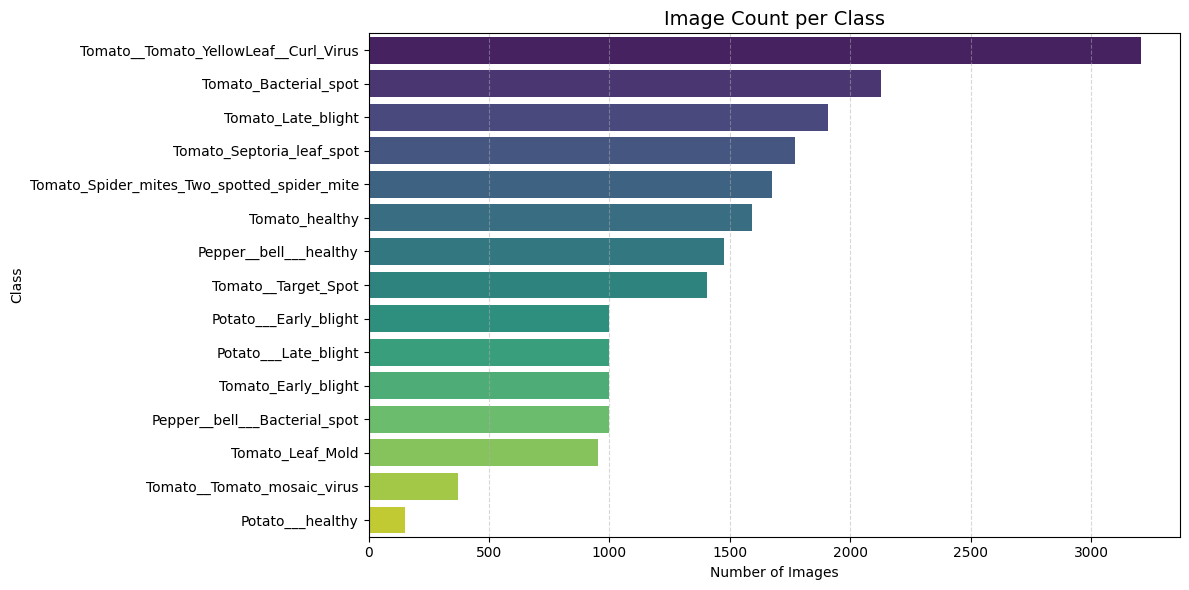

In [21]:
# Prepare output directory
output_dir = "../outputs/figures"
os.makedirs(output_dir, exist_ok=True)

# Sort by image count
sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_items)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(values), y=list(labels), palette='viridis')
plt.title("Image Count per Class", fontsize=14)
plt.xlabel("Number of Images")
plt.ylabel("Class")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Save plot
plot_path = os.path.join(output_dir, "class_distribution.png")
plt.savefig(plot_path, dpi=300)
plt.show()


### 2.Visualize images

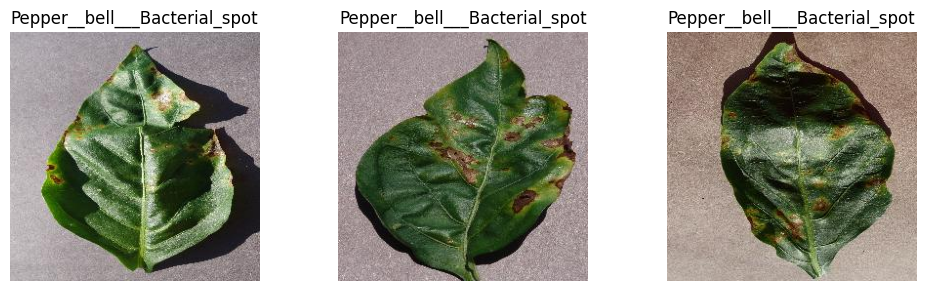

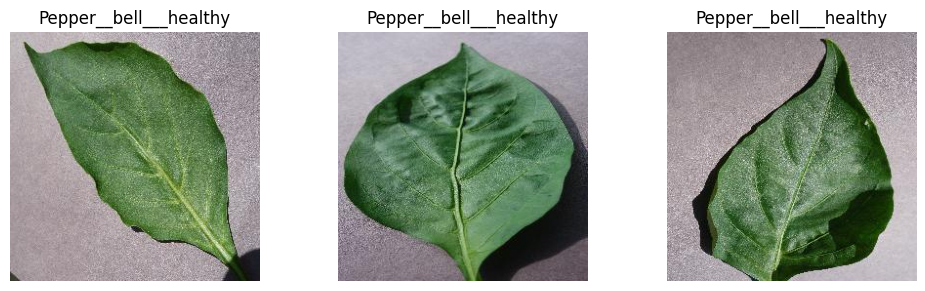

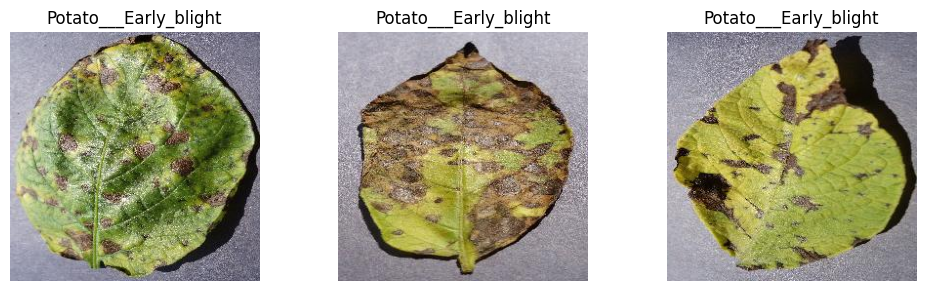

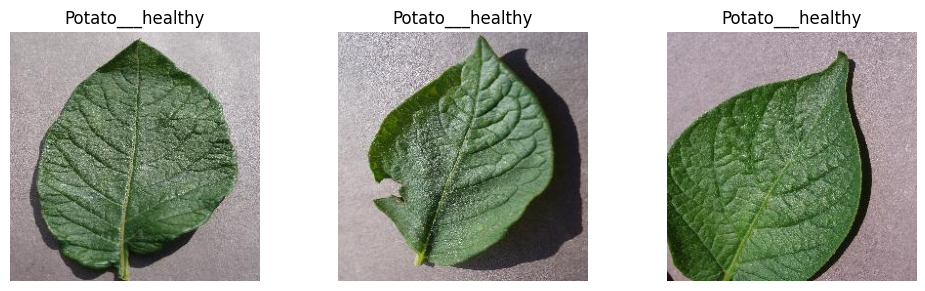

In [22]:
data_dir = "../data/PlantVillage"
sample_classes = os.listdir(data_dir)[:4]  # Just preview 4 classes

for cls in sample_classes:
    cls_path = os.path.join(data_dir, cls)
    
    image_files = [f for f in os.listdir(cls_path) 
                   if os.path.isfile(os.path.join(cls_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if len(image_files) < 3:
        print(f"[!] Skipping {cls} — only {len(image_files)} image(s)")
        continue

    samples = random.sample(image_files, 3)

    plt.figure(figsize=(10, 3))
    for i, img_name in enumerate(samples):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


### Check Image Dimensions

In [23]:
from PIL import Image
from collections import Counter

dims = Counter()
for cls in labels:
    folder = os.path.join(data_dir, cls)
    for f in os.listdir(folder)[:50]:  # Sample
        path = os.path.join(folder, f)
        img = Image.open(path)
        dims[img.size] += 1

print(dims.most_common(5))


[((256, 256), 750)]


### Conclusion:
### 750 images have dimensions 256x256 — confirms consistent image sizing in the dataset.
